## This notebook is used to show that:
- how I processed diamond price data from BlueNile 
- how I prepared train/test sets for the prediction of diamond prices given a set of features. 
- how I built different regression models to make best prediction: Linear Regression, SVM, and XGBoost

In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Data Part

In [2]:
#Open HAR files downloaded from Bluenile website 
data1 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile13k_150_150.har'))
data2 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile13k_200k_150_150.har'))
data3 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile151_153.har'))
data4 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile154_169.har'))
data5 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile170_179.har'))
data6 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile180_199.har'))
data7 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile200_200.har'))
data8 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile201_201.har'))
data9 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile202_221.har'))
data10 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile222_269.har'))
data11 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile270_310.har'))
data12 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile311_530.har'))
data13 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile531_.har'))
data14 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile9k_120_121.har'))
data15 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile9k_200k_120_121.har'))
data16 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile122_128.har'))
data17 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile129_130.har'))
data18 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile131_139.har'))
data19 = json.load(open('/Users/yan/Desktop/TDI/food labels/bluenile140_149.har'))

In [3]:
#Create dictionaries for the features that descrided in words
clarityDict = {"FL":1,"IF":2,"VVS1":3,"VVS2":4,"VS1":5,"VS2":6,"SI1":7,"SI2":8}
colorsDict = {"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7,"K":8}
culetDict = {"None":1, "Pointed": 2,"Very Small": 3, "Small":4,"Medium":5,"Slightly Large":6,"Large":7}
cutDict = {"Astor Ideal":1, "Ideal": 2, "Very Good":3,"Good":4}
fluorescenceDict = {"None":1, "Faint": 2, "Faint Blue":3,"Medium":4,"Medium Blue":5,"Strong":6,"Strong White":7,"Strong Yellow":8,"Strong Blue":9,"Very Strong Blue":10,"Very Strong":11}
polishDict = {"Excellent":1, "Very Good": 2, "Good":3}
symmetryDict = {"Excellent":1, "Very Good": 2, "Good":3}

In [4]:
#Define a function that can replace the items in list with corresponding items in dictionary
def replace(list_, dict_):
    return [dict_.get(item, item) for item in list_]

In [5]:
#Define a function that can extract the diamond features we need
def getData(rawData):
    newData=[]
    
    #Initialize multiple empty lists for the diamond features
    carat = []
    price = []
    id_ = []
    shapeName = []
    clarityRaw = []
    colorRaw = []
    culetRaw = [] 
    cutRaw = []
    depth = []
    fluorescenceRaw = []
    lxwRatio = []
    polishRaw = []
    symmetryRaw = []
    table = []
    
    #Find all the diamond feature data in XHR
    for xhr in rawData['log']['entries']:
        if xhr['request']['url'].find('startIndex')>-1:
            xhr_js = json.loads(xhr['response']['content']['text'])
            newData.extend(xhr_js['results'])
    print('Data exported')
    
    #Extract each diamond feature and store in different lists
    for i in newData:
        id_.append(i['id'])
        carat.append(float(i['carat'][0]))
        price.append(int(i['price'][0].strip('$').replace(',','')))
        shapeName.append(i['shapeName'][0])
        clarityRaw.append(i['clarity'][0])
        colorRaw.append(i['color'][0])
        culetRaw.append(i['culet'][0])
        cutRaw.append(i['cut'][0]['label'])
        depth.append(float(i['depth'][0]))
        fluorescenceRaw.append(i['fluorescence'][0])
        lxwRatio.append(float(i['lxwRatio'][0]))
        polishRaw.append(i['polish'][0])
        symmetryRaw.append(i['symmetry'][0])
        table.append(float(i['table'][0]))
    print('Diamonds details exported')
    
    #Replace the features that descrided in words with numbers
    clarity = replace(clarityRaw, clarityDict)
    color = replace(colorRaw, colorsDict)
    culet = replace(culetRaw, culetDict)
    cut = replace(cutRaw, cutDict)
    fluorescence = replace(fluorescenceRaw, fluorescenceDict)
    polish = replace(polishRaw, polishDict)
    symmetry = replace(symmetryRaw, symmetryDict)
    
    #Create a dataframe for the diamond features
    df = pd.DataFrame({'price': price,'carat': carat,'id_': id_,'shapeName': shapeName,
                   'clarity': clarity,'color': color,'culet': culet,'cut': cut,
                   'depth': depth,'fluorescence': fluorescence,'lxwRatio': lxwRatio,
                   'polish': polish,'symmetry': symmetry,'table': table})
    
    return df

In [6]:
#Get the data we need from HAR files and export to dataframe
diamonds1 = getData(data1)
diamonds2 = getData(data2)
diamonds3 = getData(data3)
diamonds4 = getData(data4)
diamonds5 = getData(data5)
diamonds6 = getData(data6)
diamonds7 = getData(data7)
diamonds8 = getData(data8)
diamonds9 = getData(data9)
diamonds10 = getData(data10)
diamonds11 = getData(data11)
diamonds12 = getData(data12)
diamonds13 = getData(data13)
diamonds14 = getData(data14)
diamonds15 = getData(data15)
diamonds16 = getData(data16)
diamonds17 = getData(data17)
diamonds18 = getData(data18)
diamonds19 = getData(data19)

Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported
Data exported
Diamonds details exported


In [7]:
#Concatenate the data together
diamondsAll = pd.concat([diamonds1, diamonds2, diamonds3, diamonds4, diamonds5, diamonds6, diamonds7, diamonds8, diamonds9, diamonds10, diamonds11, diamonds12, diamonds13, diamonds14, diamonds15, diamonds16, diamonds17, diamonds18, diamonds19])

In [8]:
diamondsAll.shape

(13037, 14)

The final data size is **13,037**.

In [9]:
diamondsAll.describe()

,price,carat,clarity,color,culet,cut,depth,fluorescence,lxwRatio,polish,symmetry,table
count,1.303700e+04,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000
mean,2.719132e+04,1.907970,5.372785,4.293319,1.086370,2.116208,62.093265,2.203344,1.007483,1.053156,1.125949,58.124300
std,5.131928e+04,0.948466,1.763743,2.118323,0.424288,0.364182,1.212928,2.077140,0.004631,0.245887,0.369644,1.850686
min,3.375000e+03,1.200000,1.000000,1.000000,1.000000,2.000000,55.300000,1.000000,1.000000,1.000000,1.000000,50.000000
25%,1.034800e+04,1.320000,4.000000,2.000000,1.000000,2.000000,61.600000,1.000000,1.000000,1.000000,1.000000,57.000000
50%,1.641200e+04,1.540000,5.000000,4.000000,1.000000,2.000000,62.300000,1.000000,1.010000,1.000000,1.000000,58.000000
75%,2.894700e+04,2.020000,7.000000,6.000000,1.000000,2.000000,62.700000,2.000000,1.010000,1.000000,1.000000,59.000000
max,2.749684e+06,18.910000,8.000000,8.000000,5.000000,4.000000,71.200000,11.000000,1.030000,3.000000,3.000000,79.000000


Correlation matrix is shown below.

In [10]:
diamondsAll.corr()

,price,carat,clarity,color,culet,cut,depth,fluorescence,lxwRatio,polish,symmetry,table
price,1.000000,0.769165,-0.156659,-0.176322,0.000334,-0.018167,-0.093186,-0.042132,-0.040901,-0.009781,-0.019385,0.018258
carat,0.769165,1.000000,-0.024808,-0.038321,-0.005866,0.023897,-0.090730,0.007841,-0.050261,0.018086,0.023467,0.041861
clarity,-0.156659,-0.024808,1.000000,0.050436,-0.044874,0.063324,0.068070,-0.068455,-0.011413,0.071577,0.057641,-0.074747
color,-0.176322,-0.038321,0.050436,1.000000,0.006207,-0.024797,0.031959,-0.091173,0.037274,-0.021247,-0.014169,0.054185
culet,0.000334,-0.005866,-0.044874,0.006207,1.000000,0.133620,-0.145455,-0.022889,-0.016606,0.205989,0.161497,0.020715
cut,-0.018167,0.023897,0.063324,-0.024797,0.133620,1.000000,0.234287,0.031531,0.161647,0.500682,0.704431,0.106838
depth,-0.093186,-0.090730,0.068070,0.031959,-0.145455,0.234287,1.000000,0.054454,0.229102,-0.053508,0.140496,-0.539257
fluorescence,-0.042132,0.007841,-0.068455,-0.091173,-0.022889,0.031531,0.054454,1.000000,0.030892,0.007372,0.002209,0.014218
lxwRatio,-0.040901,-0.050261,-0.011413,0.037274,-0.016606,0.161647,0.229102,0.030892,1.000000,0.075086,0.205851,-0.006135
polish,-0.009781,0.018086,0.071577,-0.021247,0.205989,0.500682,-0.053508,0.007372,0.075086,1.000000,0.526410,0.107863


In [11]:
diamondsAll.head()

,price,carat,id_,shapeName,clarity,color,culet,cut,depth,fluorescence,lxwRatio,polish,symmetry,table
0,7479,1.5,LD16124564,Round,8,7,1,2,63.2,1,1.01,1,1,57.0
1,7501,1.5,LD15660201,Round,7,7,2,3,65.0,1,1.02,2,2,56.0
2,7511,1.5,LD16063482,Round,4,8,1,3,63.4,4,1.01,1,1,60.0
3,7518,1.5,LD02967596,Round,8,6,1,3,60.8,1,1.01,2,2,60.0
4,7520,1.5,LD16252187,Round,5,8,1,3,63.5,2,1.01,1,2,57.0


Save out for later use. 

In [12]:
diamondsAll.to_csv('/Users/yan/Desktop/TDI/food labels/diamondsdata2.csv', index=False)

In [13]:
diamondsAll.isnull().values.any()

False

In [14]:
#Select the diamonds that lower than $30,000
new_diamonds = diamondsAll[(diamondsAll['price'] <= 30000)]

In [15]:
new_diamonds.shape

(9985, 14)

In [20]:
#Check if any duplicate diamonds
len(set(new_diamonds['id_']))

9985

In [62]:
new_diamonds.describe()

,price,carat,clarity,color,culet,cut,depth,fluorescence,lxwRatio,polish,symmetry,table
count,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000
mean,14387.387481,1.555900,5.556435,4.539209,1.087732,2.118378,62.163035,2.226940,1.007654,1.053681,1.127091,58.091587
std,6592.274513,0.329954,1.702611,2.075906,0.425917,0.368273,1.200968,2.077373,0.004530,0.247428,0.369311,1.847461
min,3375.000000,1.200000,1.000000,1.000000,1.000000,2.000000,55.300000,1.000000,1.000000,1.000000,1.000000,50.000000
25%,9104.000000,1.300000,4.000000,3.000000,1.000000,2.000000,61.600000,1.000000,1.010000,1.000000,1.000000,57.000000
50%,12960.000000,1.500000,6.000000,5.000000,1.000000,2.000000,62.400000,1.000000,1.010000,1.000000,1.000000,58.000000
75%,19033.000000,1.710000,7.000000,6.000000,1.000000,2.000000,62.800000,2.000000,1.010000,1.000000,1.000000,59.000000
max,29995.000000,3.060000,8.000000,8.000000,5.000000,4.000000,71.200000,11.000000,1.030000,3.000000,3.000000,79.000000


### Model Part

In [ ]:
from sklearn.model_selection import train_test_split

In [25]:
#Random split the data into train set and test set
train, test = train_test_split(new_diamonds, test_size=0.1, random_state=13)
#Define X and Y in train set and test set
train_X = train[['carat', 'clarity', 'color', 'culet',
       'cut', 'depth', 'fluorescence', 'lxwRatio', 'polish', 'symmetry',
       'table']]
train_Y = train['price']
test_X = test[['carat', 'clarity', 'color', 'culet',
       'cut', 'depth', 'fluorescence', 'lxwRatio', 'polish', 'symmetry',
       'table']]
test_Y = test['price']

1. Building simple linear regression model

In [207]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [210]:
#Use linear regression to fit the train set, test the model using test set
reg.fit(train_X, train_Y)
test_Y_pred = reg.predict(test_X)
#Print out RMSE, MAE and R^2
print('RMSE: ', np.sqrt(mean_squared_error(test_Y, test_Y_pred)))
print('MAE: ', mean_absolute_error(test_Y, test_Y_pred))
print('R2: ', r2_score(test_Y, test_Y_pred))

RMSE:  2121.9516773824844
MAE:  1640.7020374909441
R2:  0.8966581606942341


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

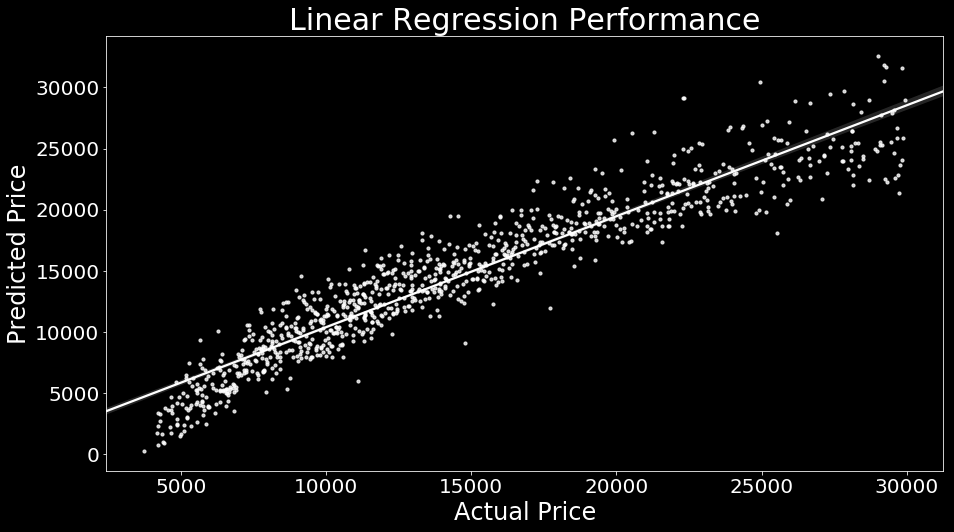

In [206]:
#Plot the graph of actual prices and predicted prices under linear regression
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = sns.regplot(test_Y, test_Y_pred, scatter_kws={'s':10}, color = 'w')
fig.set_xlabel('Actual Price',fontsize=24)
fig.set_ylabel('Predicted Price',fontsize=24)
fig.set_title("Linear Regression Performance", fontsize=30)
plt.savefig("reg1.png", transparent=True)

2. Building SVM model

In [179]:
from sklearn import svm

In [147]:
regr = svm.SVR(C=5000, gamma=0.05)

In [148]:
regr

SVR(C=5000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [211]:
#Use SVM to fit the train set, test the model using test set data
regr.fit(train_X, train_Y)
test_Y_pred2 = regr.predict(test_X)
#Print out RMSE, MAE and R^2
print('RMSE: ', np.sqrt(mean_squared_error(test_Y, test_Y_pred2)))
print('MAE: ', mean_absolute_error(test_Y, test_Y_pred2))
print('R2: ', r2_score(test_Y, test_Y_pred2))

RMSE:  1388.1402040979278
MAE:  966.8248516394054
R2:  0.9557745894598191


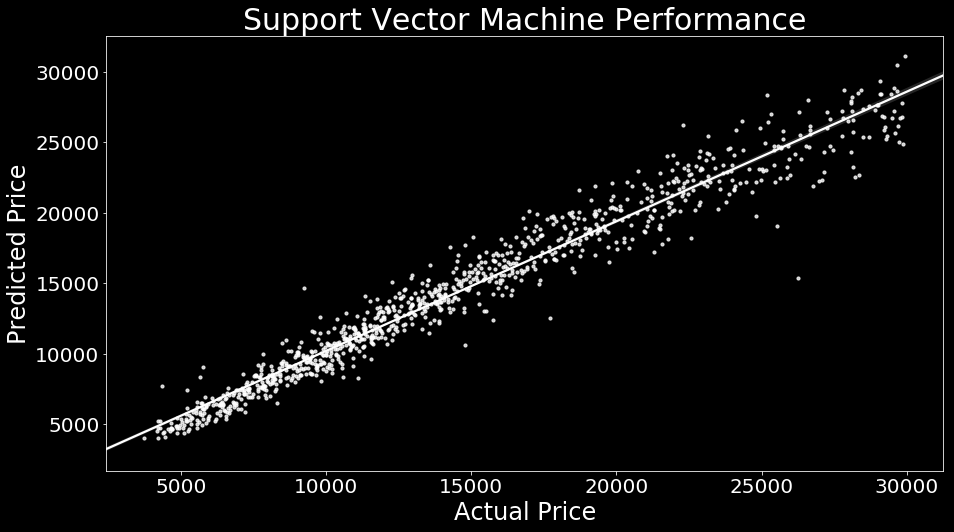

In [202]:
#Plot the graph of actual prices and predicted prices under SVM
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig2 = sns.regplot(test_Y, test_Y_pred2, scatter_kws={'s':10}, color = 'w')
fig2.set_xlabel('Actual Price',fontsize=24)
fig2.set_ylabel('Predicted Price',fontsize=24)
fig2.set_title("Support Vector Machine Performance", fontsize=30)
plt.savefig("reg2.png", transparent=True)

3. Building XGBoost model

In [151]:
from xgboost import XGBRegressor

In [169]:
reg_xgb = XGBRegressor(n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [212]:
#Use XGBoost to fit the train set, test the model using test set data
reg_xgb.fit(train_X, train_Y)
test_Y_pred3 = reg_xgb.predict(test_X)
#Print out RMSE, MAE and R^2
print('RMSE: ', np.sqrt(mean_squared_error(test_Y, test_Y_pred3)))
print('MAE: ', mean_absolute_error(test_Y, test_Y_pred3))
print('R2: ', r2_score(test_Y, test_Y_pred3))

/Users/yan/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/yan/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:21:44] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  1017.2819563783492
MAE:  728.7137704110361
R2:  0.9762486723588368


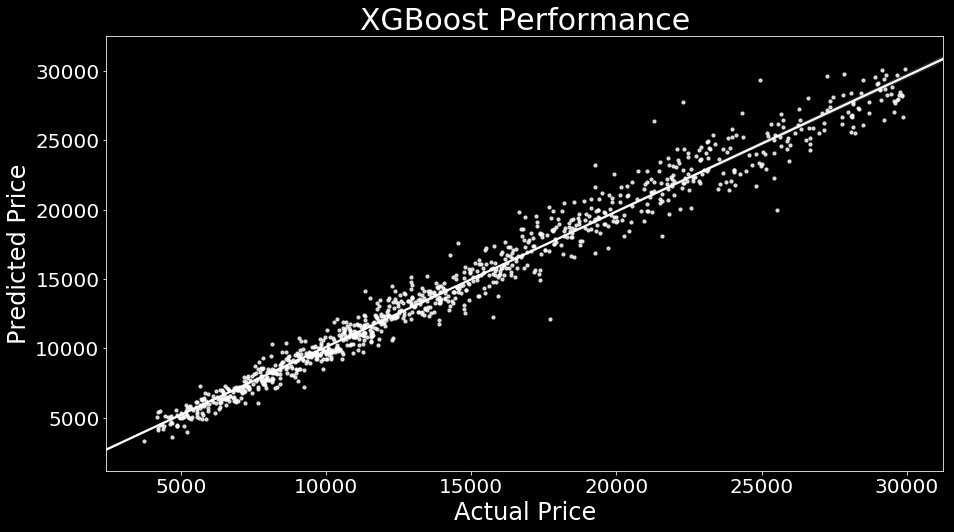

In [205]:
#Plot the graph of actual prices and predicted prices under XGBoost
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig3 = sns.regplot(test_Y, test_Y_pred3, scatter_kws={'s':10}, color = 'w')
fig3.set_xlabel('Actual Price',fontsize=24)
fig3.set_ylabel('Predicted Price',fontsize=24)
fig3.set_title("XGBoost Performance", fontsize=30)
plt.savefig("reg3.png", transparent=True)

In [172]:
from xgboost import plot_importance

<Figure size 2160x720 with 0 Axes>

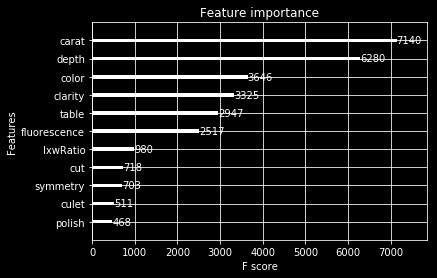

In [220]:
#Plot the graph of feature importance under XGBoost
plt.style.use('dark_background')
plt.figure(figsize=(30,10))
plot_importance(reg_xgb, color = 'w')
plt.savefig("FeatureImportance.svg", format='svg', dpi=1200, transparent=True)